Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.2002 - mae: 0.2983 - val_loss: 0.0080 - val_mae: 0.0824
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0225 - mae: 0.0999 - val_loss: 0.0050 - val_mae: 0.0515
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - mae: 0.0845 - val_loss: 0.0049 - val_mae: 0.0485
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mae: 0.0755 - val_loss: 0.0038 - val_mae: 0.0414
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0118 - mae: 0.0703 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0125 - mae: 0.0715 - val_loss: 0.0052 - val_mae: 0.0502
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0115 - mae: 0.0691 - val_loss: 0.0035 - val_mae: 0.0390
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mae: 0.0636 - val_loss: 0.0024 - val_mae: 0.0342
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mae: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2562 - mae: 0.2906 - val_loss: 0.0127 - val_mae: 0.0810
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0494 - mae: 0.1404 - val_loss: 0.0207 - val_mae: 0.0827
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0246 - mae: 0.1021 - val_loss: 0.0156 - val_mae: 0.0779
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0220 - mae: 0.0960 - val_loss: 0.0073 - val_mae: 0.0489
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168 - mae: 0.0839 - val_loss: 0.0062 - val_mae: 0.0458
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mae: 0.0814 - val_loss: 0.0056 - val_mae: 0.0462
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mae: 0.0835 - val_loss: 0.0058 - val_mae: 0.0442
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0138 - mae: 0.0776 - val_loss: 0.0073 - val_mae: 0.0501
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mae: 0.067

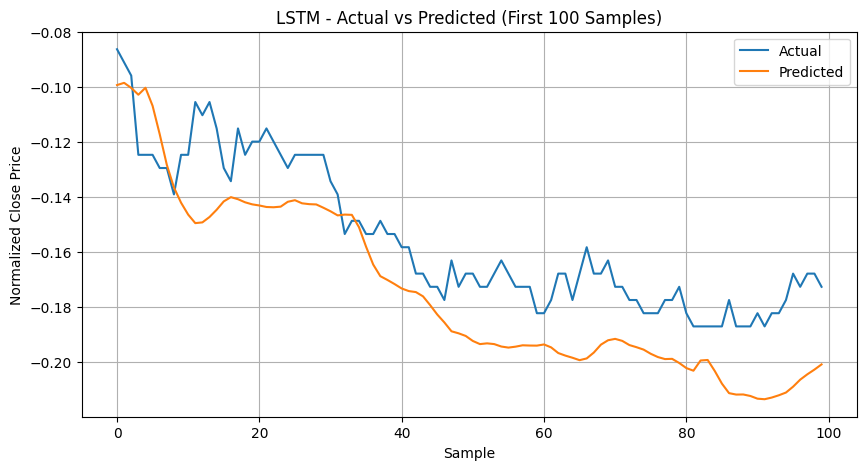

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

📊 CNN Evaluation:
MAE: 0.0483
MSE: 0.0064
RMSE: 0.0801
R² Score: 0.9603
Directional Accuracy: 34.64%


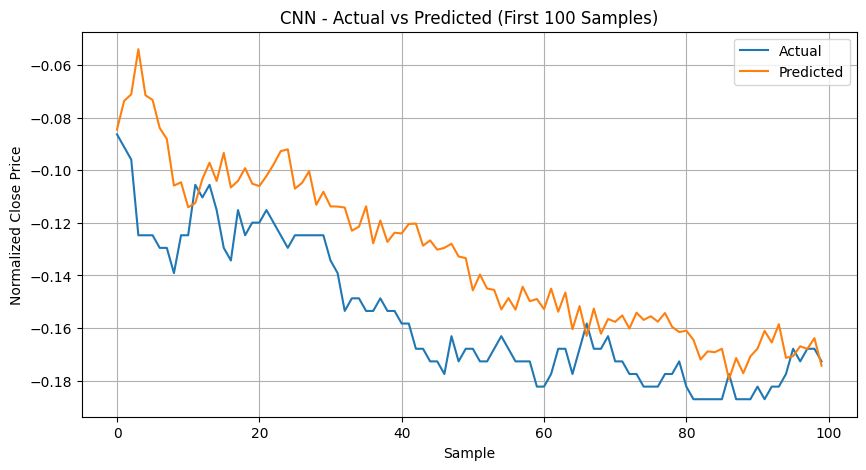

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Time series/stock_data.csv")  # Your dataset path


if 'VALUE' in df.columns:
    df = df.drop(columns=['VALUE'])


numeric_cols = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
for col in numeric_cols:
    df[col] = df[col].replace({',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values in 'VOLUME' with median (including the one null value)
df['VOLUME'] = df['VOLUME'].fillna(df['VOLUME'].median())

# Convert 'DATE' to datetime and sort by 'TRADINGCODE' and 'DATE'
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by=['TRADINGCODE', 'DATE']).reset_index(drop=True)


le = LabelEncoder()
df['TRADINGCODE_encoded'] = le.fit_transform(df['TRADINGCODE'])

# Define features and target
features = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
target = 'CLOSEP*'

# Fill any remaining NaNs in features with median (for safety)
df[features] = df[features].fillna(df[features].median())

# Scale features using RobustScaler
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])


SEQ_LEN = 30

def create_sequences(data, seq_len=SEQ_LEN):
    X, y = [], []
    for code in data['TRADINGCODE_encoded'].unique():
        code_data = data[data['TRADINGCODE_encoded'] == code][features].values
        for i in range(len(code_data) - seq_len):
            X.append(code_data[i:i+seq_len])

            y.append(code_data[i+seq_len][3])
    return np.array(X), np.array(y)

X, y = create_sequences(df, SEQ_LEN)


split_idx = int(len(X) * 0.85)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# --- 5. LSTM Model ---
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

lstm_model = build_lstm_model(X_train.shape[1:])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64,
                              validation_data=(X_test, y_test), verbose=1)

# --- 6. CNN Model ---
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=64,
                            validation_data=(X_test, y_test), verbose=1)

# --- 7. Helper Function: Directional Accuracy ---
def directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    return np.mean(actual_direction == predicted_direction) * 100

# --- 8. Evaluation Function ---
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    dacc = directional_accuracy(y_test, y_pred)

    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Directional Accuracy: {dacc:.2f}%")

    plt.figure(figsize=(10,5))
    plt.plot(y_test[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title(f'{model_name} - Actual vs Predicted (First 100 Samples)')
    plt.xlabel('Sample')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 9. Evaluate Models ---
evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


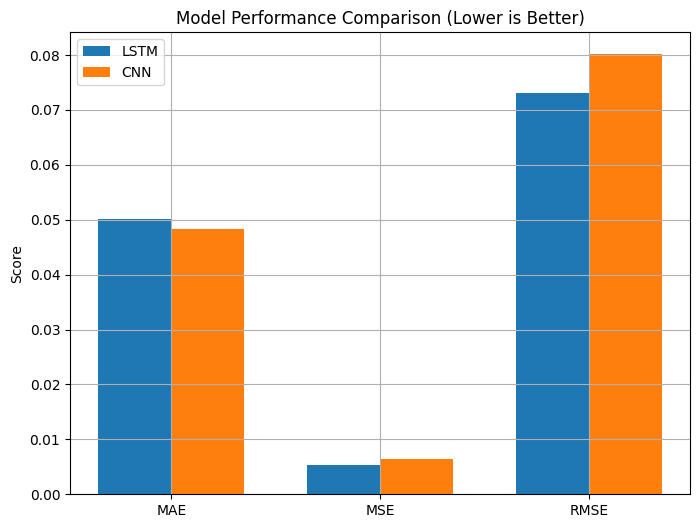

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred_lstm = lstm_model.predict(X_test).flatten()
y_pred_cnn = cnn_model.predict(X_test).flatten()

# Compute metrics
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_lstm, mse_lstm, rmse_lstm = compute_metrics(y_test, y_pred_lstm)
mae_cnn, mse_cnn, rmse_cnn = compute_metrics(y_test, y_pred_cnn)


metrics = ['MAE', 'MSE', 'RMSE']
lstm_scores = [mae_lstm, mse_lstm, rmse_lstm]
cnn_scores = [mae_cnn, mse_cnn, rmse_cnn]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, lstm_scores, width, label='LSTM')
plt.bar(x + width/2, cnn_scores, width, label='CNN')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Lower is Better)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True)
plt.show()


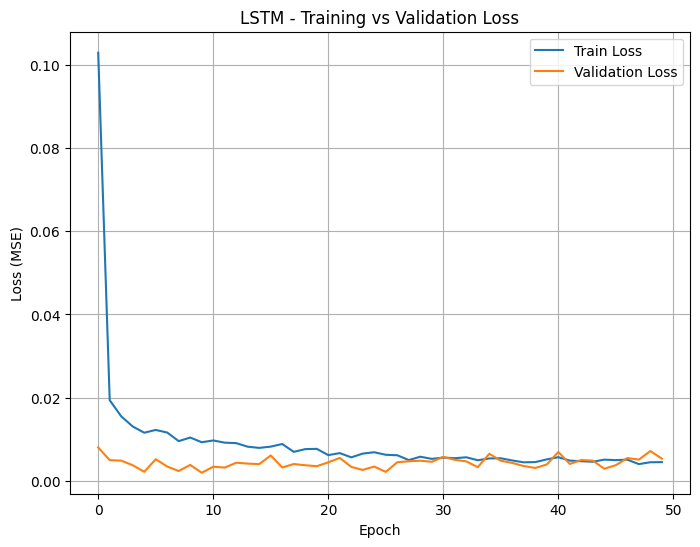

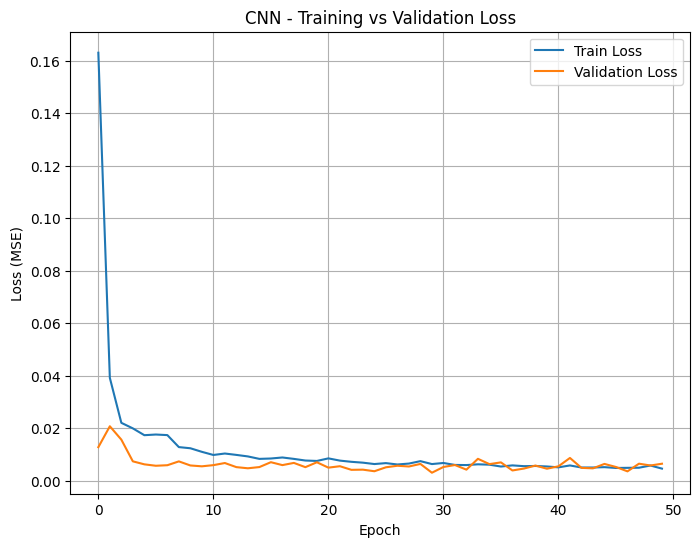

In [ ]:
# --- 2. Training/Validation Loss Curve ---
def plot_training_history(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(lstm_history, 'LSTM')
plot_training_history(cnn_history, 'CNN')

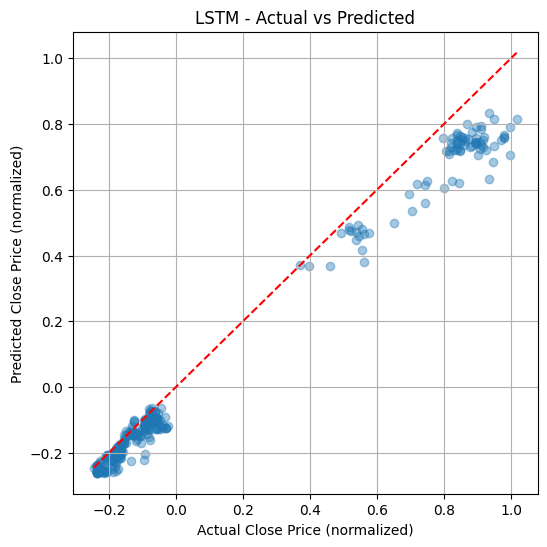

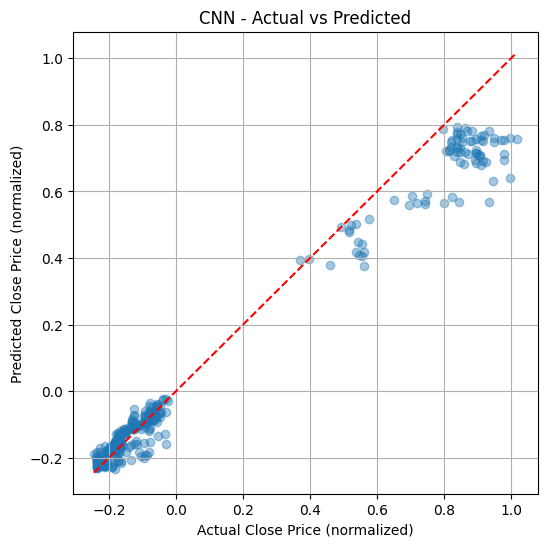

In [ ]:

def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # perfect line
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Close Price (normalized)')
    plt.ylabel('Predicted Close Price (normalized)')
    plt.grid(True)
    plt.show()

plot_scatter(y_test, y_pred_lstm, 'LSTM')
plot_scatter(y_test, y_pred_cnn, 'CNN')
